**Tarea Individual - Mejoras al algoritmo de regresión lineal**

Alumno: Francisco Aramburu, 170920

Se analizará una base de datos CalCOFI que contiene datos oceanoráficos. Se analizarán principalmente tres columnas Profundidad en metros (Depthm), Temperatura en grados celcius (T_degC) y salinidad (Salinity) de las muestras en la BD. 

La base de datos se obtuvo de: https://www.kaggle.com/sohier/calcofi


##**1.- Imports y limpieza de datos:**
Importamos las librerías que vamos a usar y limpiamos la BD.

In [243]:
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
drive.mount('/content/drive',force_remount=True)
data=pd.read_csv("/content/drive/My Drive/Semestre 8/ML/Tarea_2/bottle.csv")

In [ ]:
print(data.shape)

In [5]:
#Dropeamos las 71 columnas que no nos interesan
data.drop(data.columns.difference(['Depthm','T_degC','Salnty']), 1, inplace=True)

In [ ]:
print(data.head(10))

In [169]:
data.describe()

,Depthm,T_degC,Salnty
count,864863.000000,853900.000000,817509.000000
mean,226.831951,10.799677,33.840350
std,316.050259,4.243825,0.461843
min,0.000000,1.440000,28.431000
25%,46.000000,7.680000,33.488000
50%,125.000000,10.060000,33.863000
75%,300.000000,13.880000,34.196900
max,5351.000000,31.140000,37.034000


In [280]:
print("Profundidad")
data.isna().sum()

Profundidad


Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [281]:
print(data.shape)

(864863, 3)


In [282]:
df = data.dropna()

In [283]:
df.isna().sum()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

In [284]:
print(df.shape)

(814247, 3)


##**Funciones**
Definimos funciones que nos van a ayudar.

In [276]:
##Función que hace las regresiones Lineales.
##Parámetros:
#
# alpha: tasa de aprendizaje.
# x,y: pandas.core.series.Series. Columnas del DF a evaluar.
# m: nùmero de observaciones.
# a,b: parámetros de la reacta a ajustar.
# maxIter: número máximo de iteraciones.
# r: parámetro para acomodar subplots.
# ax: parámetro de subplots.

def regLin(alpha, x, y, m, a, b, maxIter, r, ax):

#Inicializamos
  error = 0;
  converge = False;
  i = 1; 
  loga=[];
  logb=[];
  loge=[];
  while not converge and i <= maxIter:
    #Observar
    yF = a*x + b
    #Actualizar
    nuevoError = (1/(2*m))*sum((yF - y)**2)
    nuevaA = a - alpha*(1/m)*sum((yF - y)*x);
    nuevaB = b - alpha*(1/m)*sum(yF - y);
    if((math.isclose(a,nuevaA, rel_tol=1e-5) and math.isclose(b,nuevaB, rel_tol=1e-5)) or math.isclose(error,nuevoError, rel_tol=1e-5) ):
      converge = True;
    a = nuevaA
    b = nuevaB
    error = nuevoError
    loge.append(error)
    loga.append(a)
    logb.append(b)
    i += 1
  #Grafica los puntos y la linea que los minimiza. 
  ax[0][r].set_ylim(30, 36)
  ax[0][r].plot(x,y,'o', label='Muestra')
  ax[0][r].plot(x,a*x+b, label='Regresion')
  ax[0][r].set_xlabel('Temperatura')

  #Grafica como van cambiando la a y la b.
  ax[1][r].set_ylim(0, 36)
  ax[1][r].plot(loga, label='A', color = 'g')
  ax[1][r].plot(logb, label='B', color = 'y')
  

  #Grafico del Error.
  ax[2][r].set_ylim(0, 100)
  ax[2][r].plot(loge, label='E', color = 'r')
  ax[2][r].set_xlabel('alpha= ' + str(alpha) +  '\nerr= ' + str(round(error,3)) +
                      '\nA= ' + str(round(a,3)) + '\nB= ' + str(round(b,3)))
  




In [294]:
##Función que hace las regresiones Lineales.
##Parámetros:
#
# alpha: tasa de aprendizaje.
# x,y: pandas.core.series.Series. Columnas del DF a evaluar.
# m: nùmero de observaciones.
# a,b: parámetros de la reacta a ajustar.
# maxIter: número máximo de iteraciones.
# r: parámetro para acomodar subplots.
# ax: parámetro de subplots.

def regLinMod(alpha, x, y, m, a, b, maxIter, r, ax):

#Inicializamos
  error = 0;
  converge = False;
  i = 1; 
  loga=[];
  logb=[];
  loge=[];
  while not converge and i <= maxIter:
    #Observar
    yF = a*x + b
    #Actualizar
    nuevoError = (1/(2*m))*sum((yF - y)**2)
    nuevaA = a - alpha*(1/m)*sum((yF - y)*x);
    nuevaB = b - alpha*(1/m)*sum(yF - y);
    if((math.isclose(a,nuevaA, rel_tol=1e-5) and math.isclose(b,nuevaB, rel_tol=1e-5)) or math.isclose(error,nuevoError, rel_tol=1e-5) ):
      converge = True;
    a = nuevaA
    b = nuevaB
    error = nuevoError
    loge.append(error)
    loga.append(a)
    logb.append(b)
    i += 1
  #Grafica los puntos y la linea que los minimiza. 
  ax[0].set_ylim(30, 36)
  ax[0].plot(x,y,'o', label='Muestra')
  ax[0].plot(x,a*x+b, label='Regresion')
  ax[0].set_xlabel('Temperatura')

  #Grafica como van cambiando la a y la b.
  ax[1].set_ylim(0, 36)
  ax[1].plot(loga, label='A', color = 'g')
  ax[1].plot(logb, label='B', color = 'y')
  

  #Grafico del Error.
  ax[2].set_ylim(0, 100)
  ax[2].plot(loge, label='E', color = 'r')
  ax[2].set_xlabel('alpha= ' + str(alpha) +  '\nerr= ' + str(round(error,3)) +
                      '\nA= ' + str(round(a,3)) + '\nB= ' + str(round(b,3)))

In [43]:
def grafCols(col1, col2, labelx, labely):
  fig, ax = plt.subplots()
  ax.scatter(col1,col2)
  ax.set_xlabel(labelx)
  ax.set_ylabel(labely)
  plt.show()

##**Vision General**

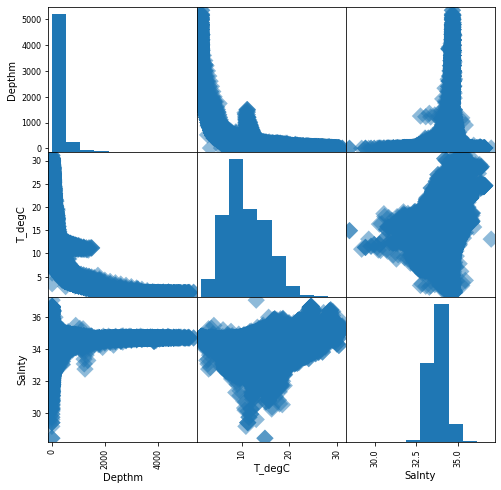

In [38]:
#Buscamos relaciones entre las variables, queremos ver qué podemos modelar 
#"bien" con una regresión lineal
_ = pd.plotting.scatter_matrix(df , figsize=[8,8], s=150, marker = 'D')

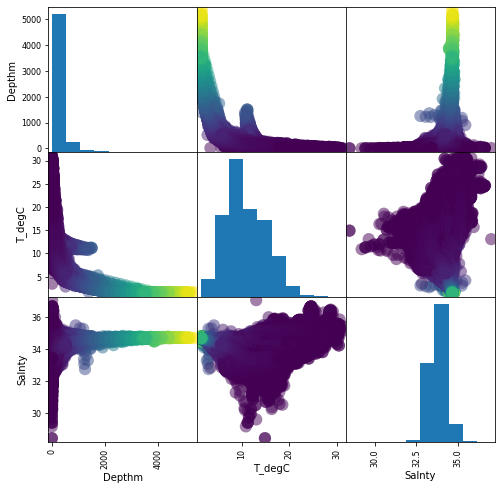

In [42]:
#Mismo gráfico pero con color=profundidad
_ = pd.plotting.scatter_matrix(df, c=df['Depthm'] , figsize=[8,8], s=150, marker = 'o')

##**Temperatura vs. Salinidad**

In [58]:
#La base de datos era DEMADIADO pesada, para que todo corriera en 
#un tiempo aceptable dropeamos 700,000 observaciones. 
#Nota: Esto fue para pruebas, más abajo se procesan todos los datos.
df3 = df.drop(df.index[100001:814247])

In [286]:
df3.shape

(100001, 3)

In [214]:
#Definimos variables de lo que vamos a procesar
x = df3['T_degC']
y = df3['Salnty']
m = 100001

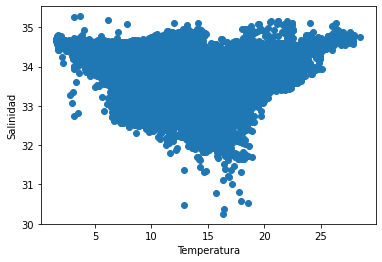

In [167]:
grafCols(df3['T_degC'],df3['Salnty'], 'Temperatura', 'Salinidad')

###Graficamos 6 valores de alpha con 100 iteraciones y observamos resultados

[]

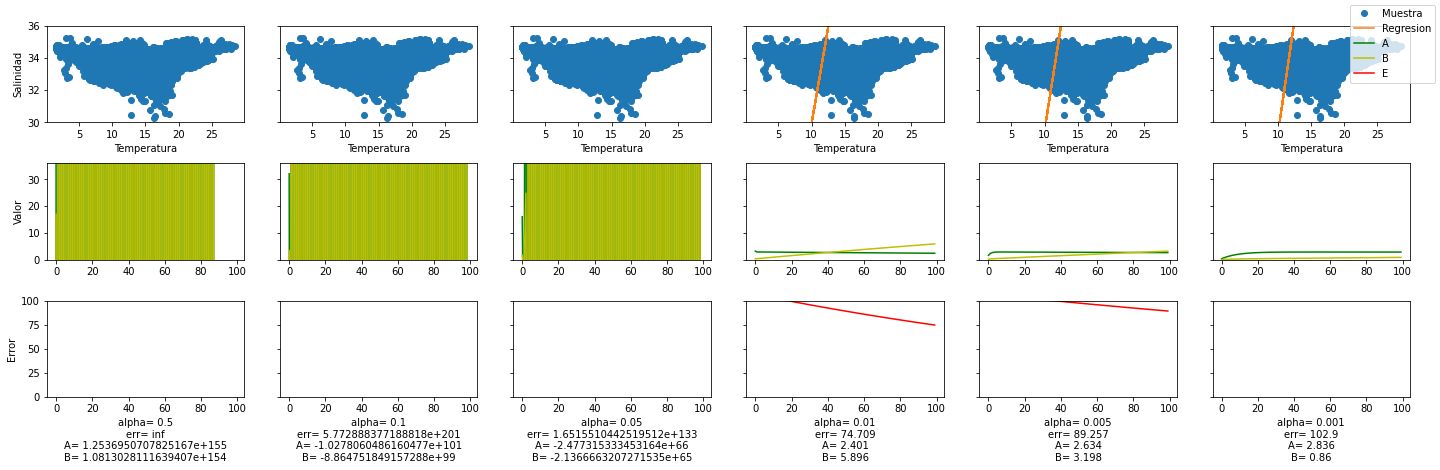

In [277]:
#Graficamos 6 valores de alpha con 100 repeticiones y observamos resultados

fig, ax = plt.subplots(3,6,figsize=(20,6), sharex='row', sharey='row')
j=0;
alpha = [0.5,0.1,0.05,0.01,0.005,0.001]
plt.tight_layout(pad=2)
while j < 6: 
  regLin(alpha[j], x, y, m, 0, 0, 100, j, ax)
  j = j+1
ax[2][0].set_ylabel('Error')
ax[1][0].set_ylabel('Valor')
ax[0][0].set_ylabel('Salinidad')
lines = []
labels = []
for k in range(0,3):
  axLine, axLabel = ax[k][0].get_legend_handles_labels()
  lines.extend(axLine)
  labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.plot()

###Graficamos 6 valores de alpha con 1000 iteraciones y observamos resultados

[]

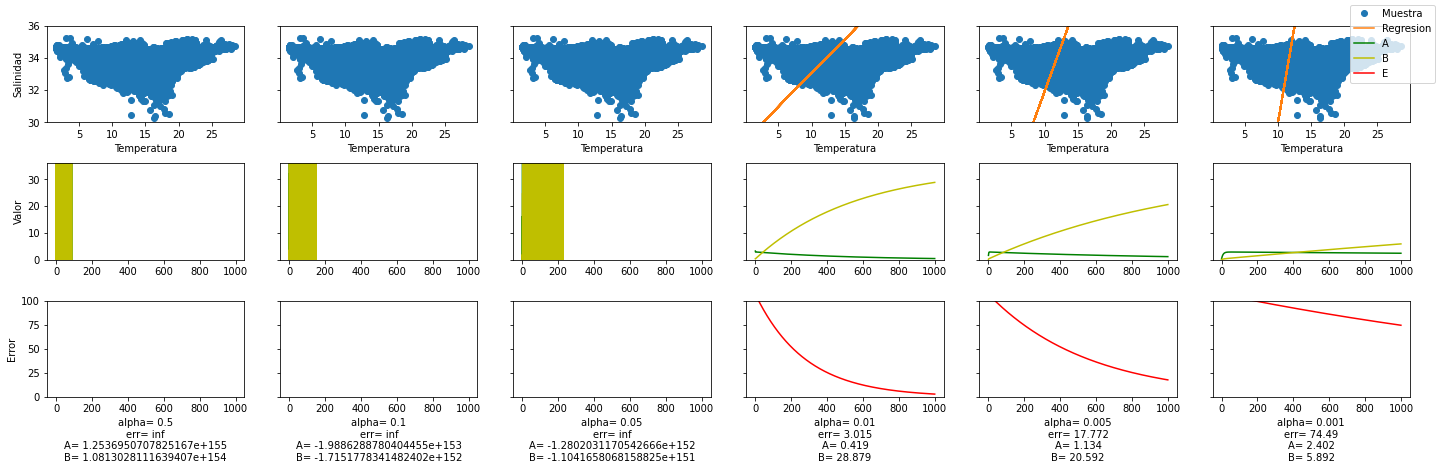

In [278]:
#Graficamos 6 valores de alpha con 1000 repeticiones y observamos resultados

fig, ax = plt.subplots(3,6,figsize=(20,6), sharex='row', sharey='row')
j=0;
alpha = [0.5,0.1,0.05,0.01,0.005,0.001]
plt.tight_layout(pad=2)
while j < 6: 
  regLin(alpha[j], x, y, m, 0, 0, 1000, j, ax)
  j = j+1
ax[2][0].set_ylabel('Error')
ax[1][0].set_ylabel('Valor')
ax[0][0].set_ylabel('Salinidad')
lines = []
labels = []
for k in range(0,3):
  axLine, axLabel = ax[k][0].get_legend_handles_labels()
  lines.extend(axLine)
  labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.plot()

###Graficamos 6 valores de alpha con 5000 iteraciones y observamos resultados

[]

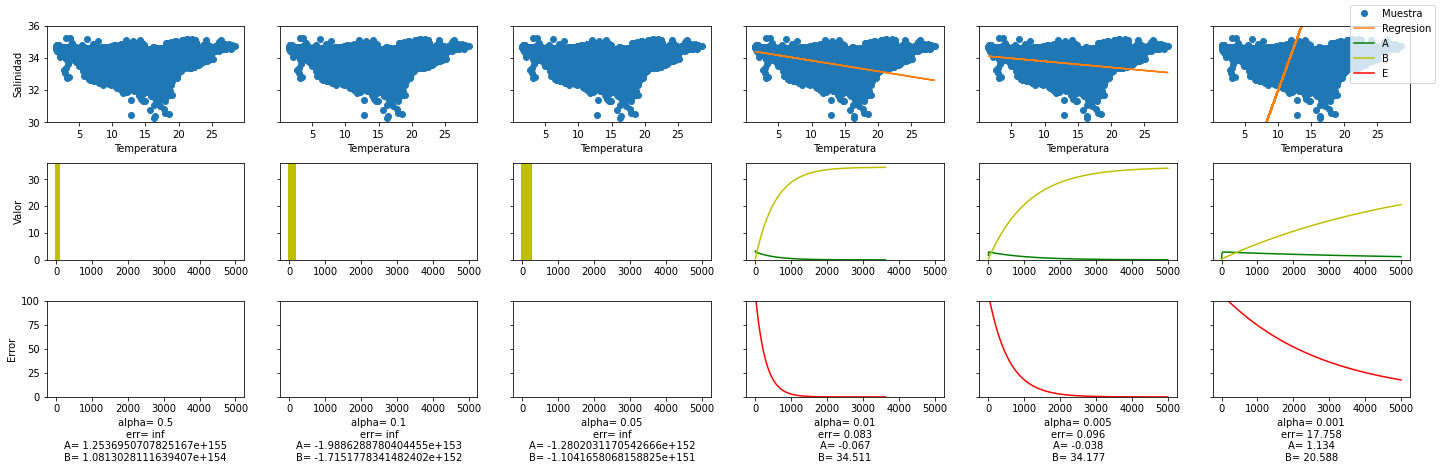

In [279]:
#Graficamos 6 valores de alpha con 5000 repeticiones y observamos resultados

fig, ax = plt.subplots(3,6,figsize=(20,6), sharex='row', sharey='row')
j=0;
alpha = [0.5,0.1,0.05,0.01,0.005,0.001]
plt.tight_layout(pad=2)
while j < 6: 
  regLin(alpha[j], x, y, m, 0, 0, 5000, j, ax)
  j = j+1
ax[2][0].set_ylabel('Error')
ax[1][0].set_ylabel('Valor')
ax[0][0].set_ylabel('Salinidad')
lines = []
labels = []
for k in range(0,3):
  axLine, axLabel = ax[k][0].get_legend_handles_labels()
  lines.extend(axLine)
  labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.plot()

In [244]:
fig.savefig("5K.png")
files.download("5K.png") 

In [182]:
#Verificamos resultados. 
regM = LinearRegression()
xx = pd.DataFrame(df3['Salnty'])   
yy = pd.DataFrame(df3['T_degC'])
regM.fit(yy,xx)
print('a: ', regM.coef_)
print('b: ', regM.intercept_)



a:  [[-0.07086749]]
b:  [34.561169]


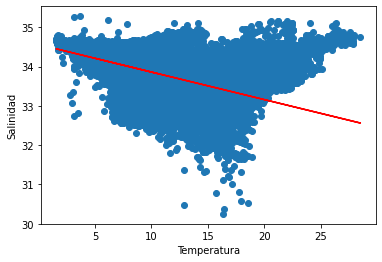

In [330]:
#Graficamos los resultados que debemos obtener
grafCols2(df3['T_degC'], df3['Salnty'], 'Temperatura', 'Salinidad', -0.07, 34.56)

#**Repetimos análisis pero con datos completos (814,247 obs.)**

In [289]:
df.shape

(814247, 3)

In [290]:
x = df['T_degC']
y = df['Salnty']
m = 814247

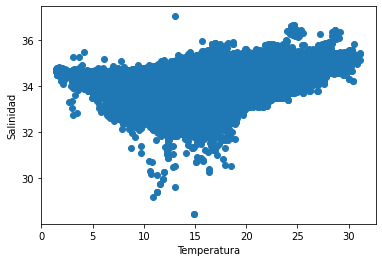

In [291]:
grafCols(df['T_degC'],df['Salnty'], 'Temperatura', 'Salinidad')

###6 valores de alpha con 100 iteraciones

[]

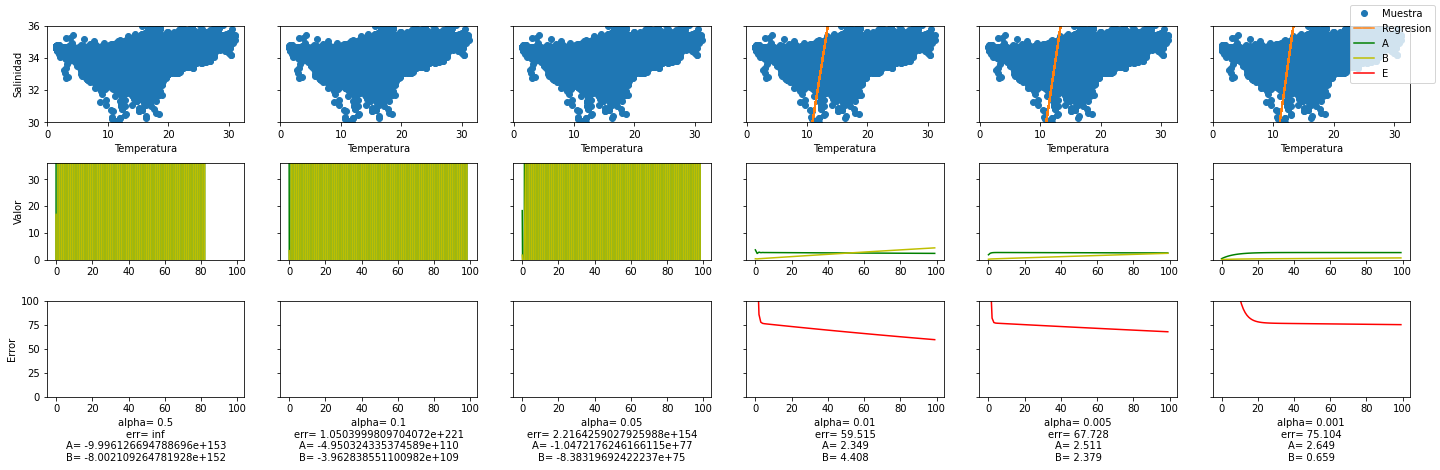

In [292]:
#Graficamos 6 valores de alpha con 100 repeticiones y observamos resultados

fig, ax = plt.subplots(3,6,figsize=(20,6), sharex='row', sharey='row')
j=0;
alpha = [0.5,0.1,0.05,0.01,0.005,0.001]
plt.tight_layout(pad=2)
while j < 6: 
  regLin(alpha[j], x, y, m, 0, 0, 100, j, ax)
  j = j+1
ax[2][0].set_ylabel('Error')
ax[1][0].set_ylabel('Valor')
ax[0][0].set_ylabel('Salinidad')
lines = []
labels = []
for k in range(0,3):
  axLine, axLabel = ax[k][0].get_legend_handles_labels()
  lines.extend(axLine)
  labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.plot()

###6 valores de alpha con 1000 iteraciones

[]

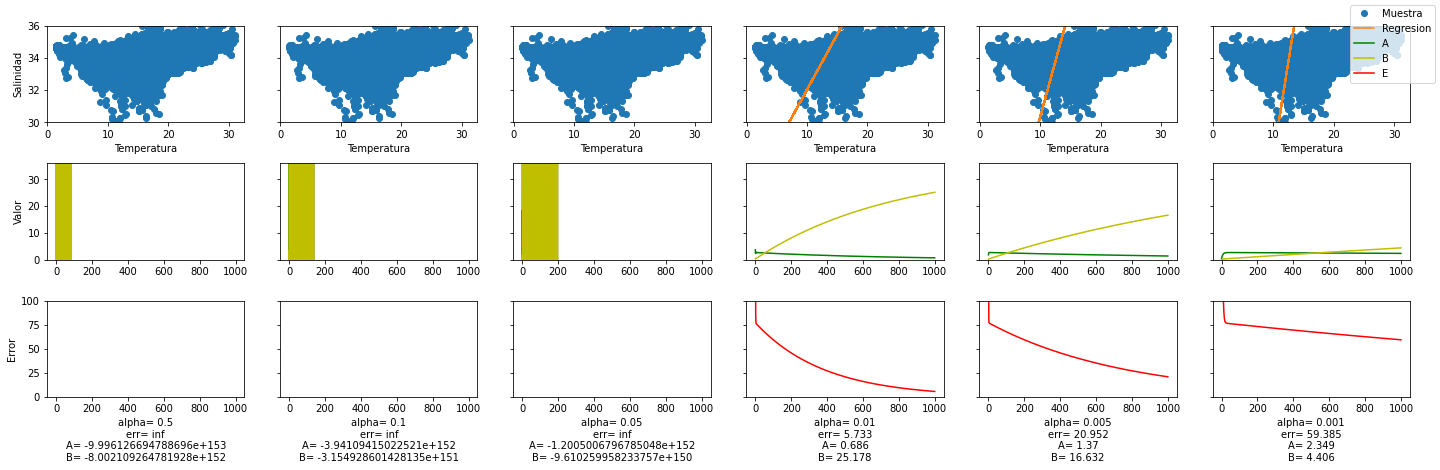

In [293]:
#Graficamos 6 valores de alpha con 100 repeticiones y observamos resultados

fig, ax = plt.subplots(3,6,figsize=(20,6), sharex='row', sharey='row')
j=0;
alpha = [0.5,0.1,0.05,0.01,0.005,0.001]
plt.tight_layout(pad=2)
while j < 6: 
  regLin(alpha[j], x, y, m, 0, 0, 1000, j, ax)
  j = j+1
ax[2][0].set_ylabel('Error')
ax[1][0].set_ylabel('Valor')
ax[0][0].set_ylabel('Salinidad')
lines = []
labels = []
for k in range(0,3):
  axLine, axLabel = ax[k][0].get_legend_handles_labels()
  lines.extend(axLine)
  labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.plot()

###5000 iteraciones
Notamos que el alpha que mejor se adapta al conjunto de datos es 0.01
por lo que solo iteramos sobre ella.

[]

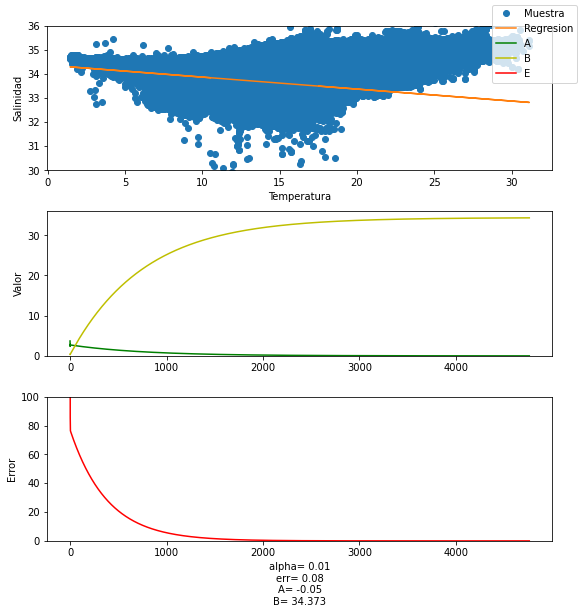

In [302]:
#Graficamos alpha con 5000 repeticiones y observamos resultados

fig, ax = plt.subplots(3,figsize=(8,8), sharex='row', sharey='row')

alpha = 0.01
plt.tight_layout(pad=2)
regLinMod(alpha, x, y, m, 0, 0, 5000, 0, ax)
ax[2].set_ylabel('Error')
ax[1].set_ylabel('Valor')
ax[0].set_ylabel('Salinidad')
lines = []
labels = []
for k in range(0,3):
  axLine, axLabel = ax[k].get_legend_handles_labels()
  lines.extend(axLine)
  labels.extend(axLabel)
fig.legend(lines, labels, loc = 'upper right')
plt.plot()

In [287]:
#Verificamos resultados. 
regM = LinearRegression()
xx = pd.DataFrame(df['Salnty'])   
yy = pd.DataFrame(df['T_degC'])
regM.fit(yy,xx)
print('a: ', regM.coef_)
print('b: ', regM.intercept_)



a:  [[-0.05520775]]
b:  [34.44090911]


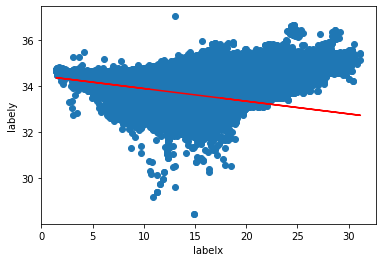

In [303]:
#Graficamos los resultados
grafCols2(df['T_degC'], df['Salnty'], 'labelx', 'labely', -0.05520775, 34.440909)

#**2.-Pruebas con datos generados**

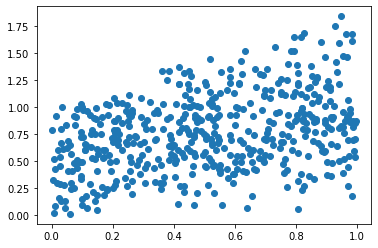

In [328]:
#Datos
m = 500
np.random.seed(203)
w=np.random.random(m)
p = np.random.random(m)*w + np.random.random(m)
plt.plot(w,p, 'o')
plt.show()

###Función auxiliar

In [309]:
def regLinAux(alpha, x, y, m, a, b, maxIter, r, ax):

#Inicializamos

  error = 0;
  converge = False;
  i = 1; 
  loga=[];
  logb=[];
  loge=[];
  while not converge and i <= maxIter:
    #Observar
    yF = a*x + b
    #Actualizar
    error = (1/(2*m))*sum((yF - y)**2)
    nuevaA = a - alpha*(1/m)*sum((yF - y)*x);
    nuevaB = b - alpha*(1/m)*sum(yF - y);
    if((math.isclose(a,nuevaA, rel_tol=1e-9) and math.isclose(b,nuevaB, rel_tol=1e-9)) or error < 1e-5):
      converge = True;
    a = nuevaA
    b = nuevaB
    loge.append(error)
    loga.append(a)
    logb.append(b)
    i += 1
  #Grafico los puntos y la linea que los minimiza. 
  ax[0][r].plot(x,y,'o', label='Muestra')
  ax[0][r].plot(x,a*x+b, label='Regresion')
  ax[0][r].set_xlabel('Temperatura')

  #Grafico como van cambiando la a y la b
  ax[1][r].plot(loga, label='A', color = 'g')
  ax[1][r].plot(logb, label='B', color = 'y')
  ax[1][r].plot(loge, label='E', color = 'r')
  ax[1][r].set_xlabel('alpha= ' + str(alpha) +  '\nerr= ' + str(round(error,6)) +
                      '\nA= ' + str(round(a,6)) + '\nB= ' + str(round(b,6)))


###Procesamiento

[]

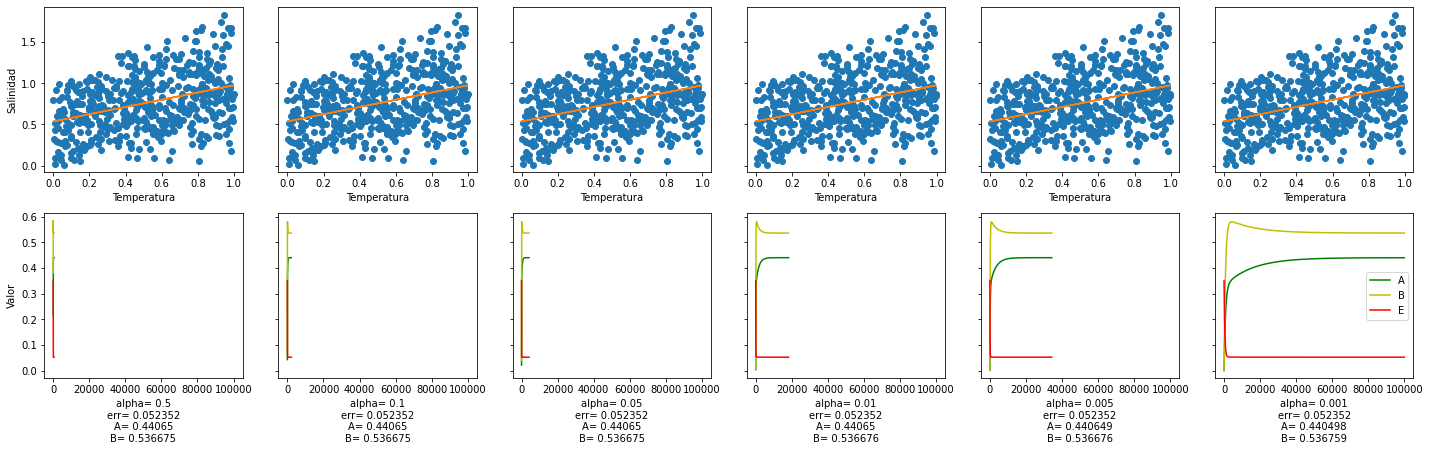

In [329]:
fig, ax = plt.subplots(2,6,figsize=(20,6), sharex='row', sharey='row')
j=0;
alpha = [0.5,0.1,0.05,0.01,0.005,0.001]
plt.tight_layout(pad=2)
while j < 6: 
  regLinAux(alpha[j], w, p, m, 0, 0, 100000, j, ax)
  j = j+1
plt.legend();
ax[1][0].set_ylabel('Valor')
ax[0][0].set_ylabel('Salinidad')
plt.plot()

In [327]:
#Respuesta Esperada
regM = LinearRegression()
ww = w.reshape(-1,1)
pp = p.reshape(-1,1)
regM.fit(ww,pp)
print('a: ', regM.coef_)
print('b: ', regM.intercept_)

a:  [[-0.1670648]]
b:  [12.99692263]
